<a href="https://colab.research.google.com/github/SHIVASAI16256/STML/blob/main/2303A52488_SML_PROJECT__CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                  

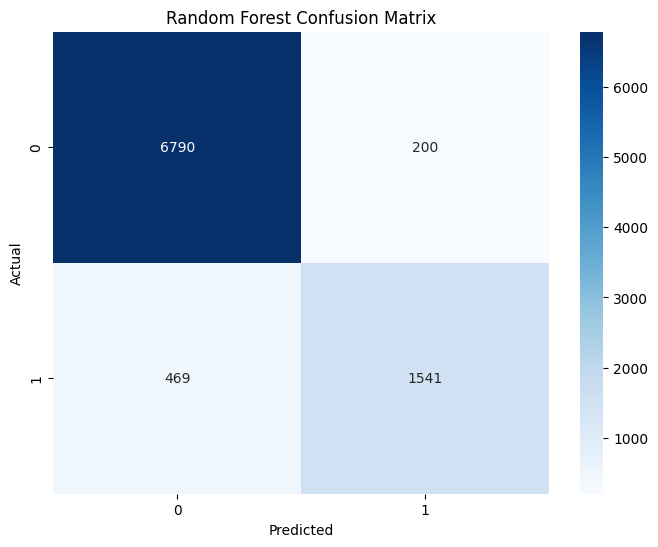

SVM Accuracy: 0.80
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6990
           1       0.80      0.15      0.25      2010

    accuracy                           0.80      9000
   macro avg       0.80      0.57      0.57      9000
weighted avg       0.80      0.80      0.74      9000

SVM Confusion Matrix:
[[6916   74]
 [1713  297]]


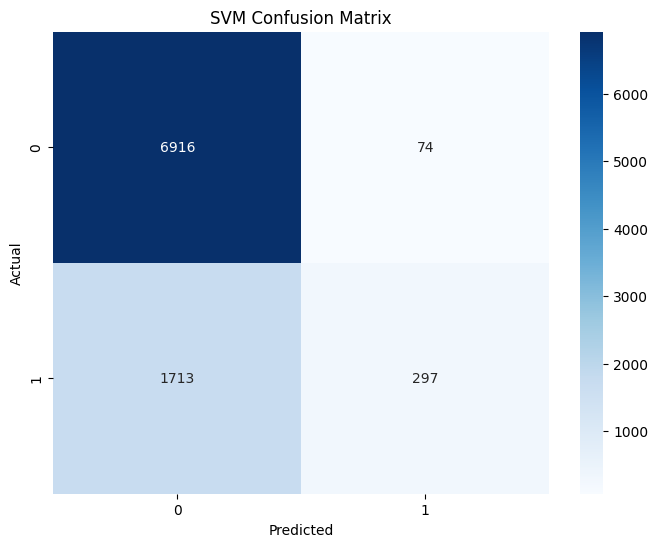

Decision Tree Accuracy: 0.90
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6990
           1       0.77      0.78      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000

Decision Tree Confusion Matrix:
[[6519  471]
 [ 451 1559]]


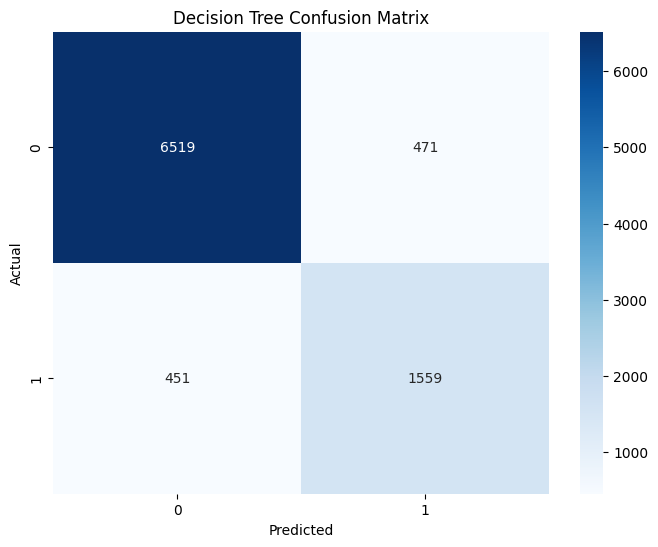

KNN Accuracy: 0.83
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6990
           1       0.65      0.51      0.58      2010

    accuracy                           0.83      9000
   macro avg       0.76      0.72      0.73      9000
weighted avg       0.82      0.83      0.82      9000

KNN Confusion Matrix:
[[6441  549]
 [ 977 1033]]


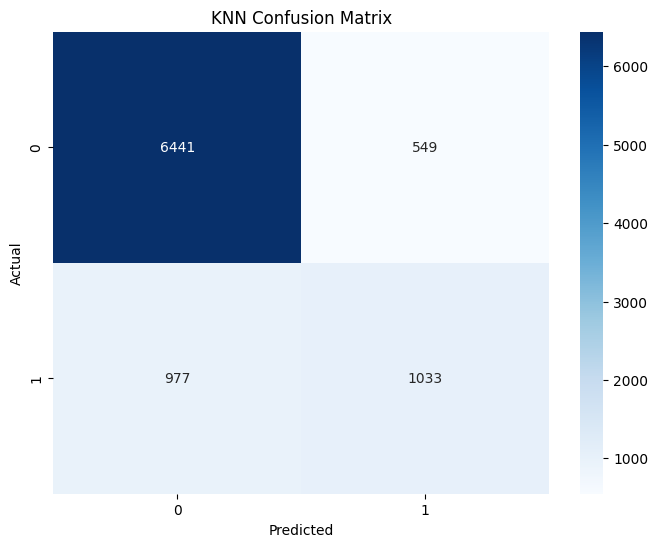

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

drive.mount('/content/drive')

path = "/content/drive/MyDrive/SML AIML ASSIGNMENTS/SML ASSIGNMENTS/loan_data.csv"
df = pd.read_csv(path)

print(df.head())
print("Columns in DataFrame:", df.columns.tolist())

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
   le = LabelEncoder()
   df[column] = le.fit_transform(df[column])
   label_encoders[column] = le

target_column = 'loan_status'
if target_column not in label_encoders:
   le_target = LabelEncoder()
   df[target_column] = le_target.fit_transform(df[target_column])
   label_encoders[target_column] = le_target

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for column in X_train.columns:
   X_train[column] = X_train[column].fillna(X_train[column].mean())
   X_test[column] = X_test[column].fillna(X_train[column].mean())

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

classifiers = {
   'Random Forest': RandomForestClassifier(),
   'SVM': SVC(),
   'Decision Tree': DecisionTreeClassifier(),
   'KNN': KNeighborsClassifier()
}

for name, clf in classifiers.items():
   clf.fit(X_train, y_train)

   y_pred = clf.predict(X_test)
   accuracy = accuracy_score(y_test, y_pred)
   print(f"{name} Accuracy: {accuracy:.2f}")
   print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
   cm = confusion_matrix(y_test, y_pred)
   print(f"{name} Confusion Matrix:\n{cm}")

   plt.figure(figsize=(8, 6))

   xticklabels = label_encoders.get(target_column).classes_ if target_column in label_encoders else []

   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=xticklabels,
               yticklabels=xticklabels)

   plt.title(f'{name} Confusion Matrix')
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   plt.show()